# Libraries

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import math

# Load Dataset

In [22]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Dataset Overview

In [23]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# Summary Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [26]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [27]:
print("Unique Species:")
df['species'].unique()

Unique Species:


['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [28]:
print("Number of instances per species:")
print(df['species'].value_counts())

Number of instances per species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [29]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Insights
- The Iris dataset has 150 samples with no missing values.
- There have 3 species (`Setosa`, `Versicolor`, `Virginica`), each has 50 samples.

# Visualization

## Relationship between columns

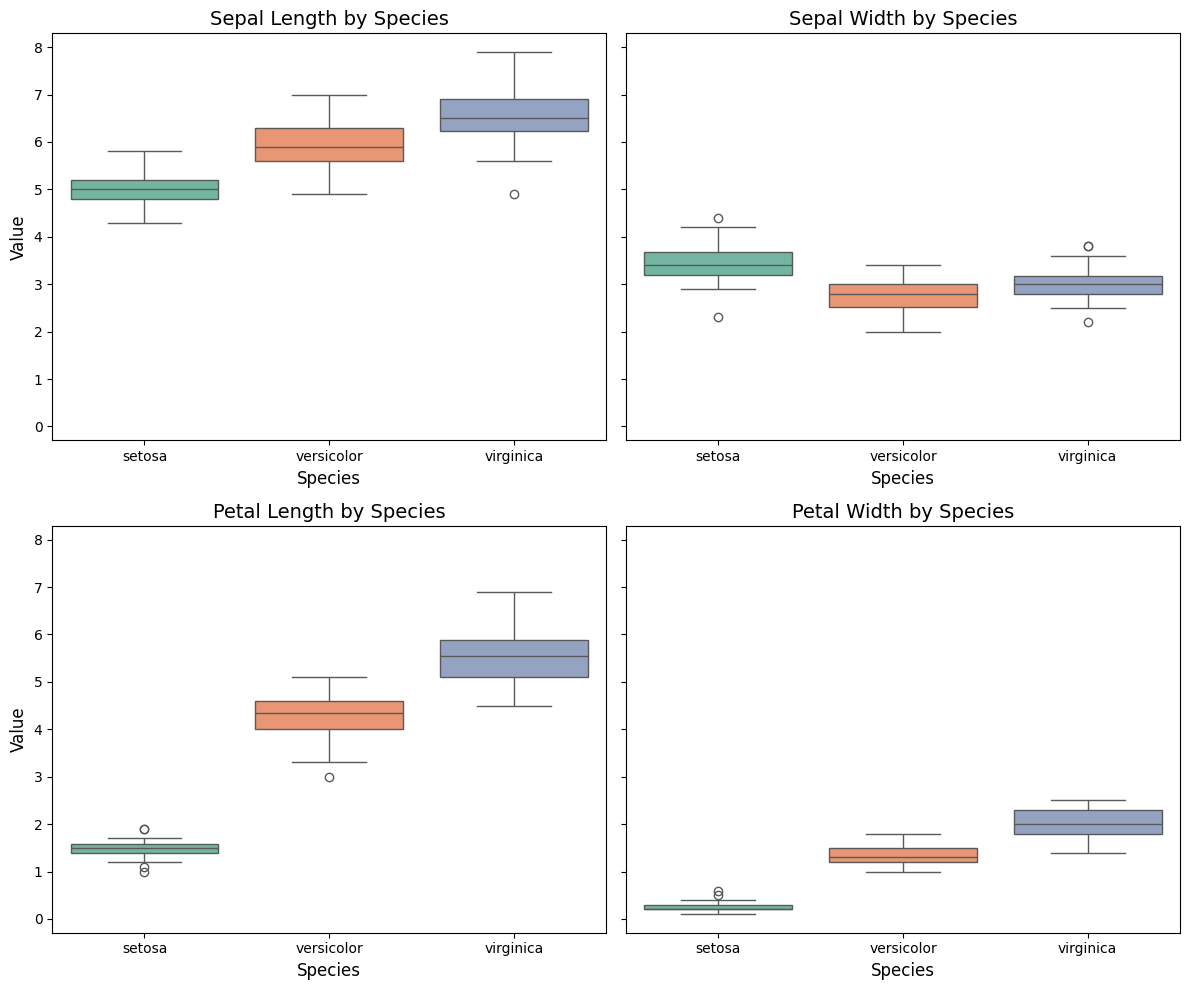

In [30]:
# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Features to plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = [
    "Sepal Length by Species",
    "Sepal Width by Species",
    "Petal Length by Species",
    "Petal Width by Species"
]

# Create box plots for each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # Determine row and column index
    sns.boxplot(x="species", y=feature, hue="species", data=df, ax=axes[row, col], palette="Set2", dodge=False)
    axes[row, col].set_title(titles[i], fontsize=14)
    axes[row, col].set_xlabel("Species", fontsize=12)
    axes[row, col].set_ylabel("Value", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Insights
### Sepal Length
- Setosa has a narrow range.
- Versicolor overlap with both setosa and virginica, but the median is distinctly higher than setosa.
- Virginica shows the highest median, which is distinctly higher than versicolor.
### Sepal Width
- Setosa has a wide range, indicating some variability.
- Versicolor overlap with both setosa and virginica, with a slightly lower median than setosa.
- Virginica has the lowest median sepal width compared to the other species.
### Petal Length
- Setosa is clearly separated from the other two species, with no overlap.
- Versicolor has slight overlap with virginica but not with setosa, median is distinctly higher than setosa and lower than virginica.
- Virginica has highest median and completely separated from setosa.
### Petal Width 
- Setosa has no overlap with the other species.
- Versicolor has slight overlap with virginica but not with setosa, median is distinctly higher than setosa and lower than virginica.
- Virginica has highest median and completely separated from setosa.
### Summary
Petal length and petal width are the most discriminative features for distinguishing species.

## Distribution for individual features

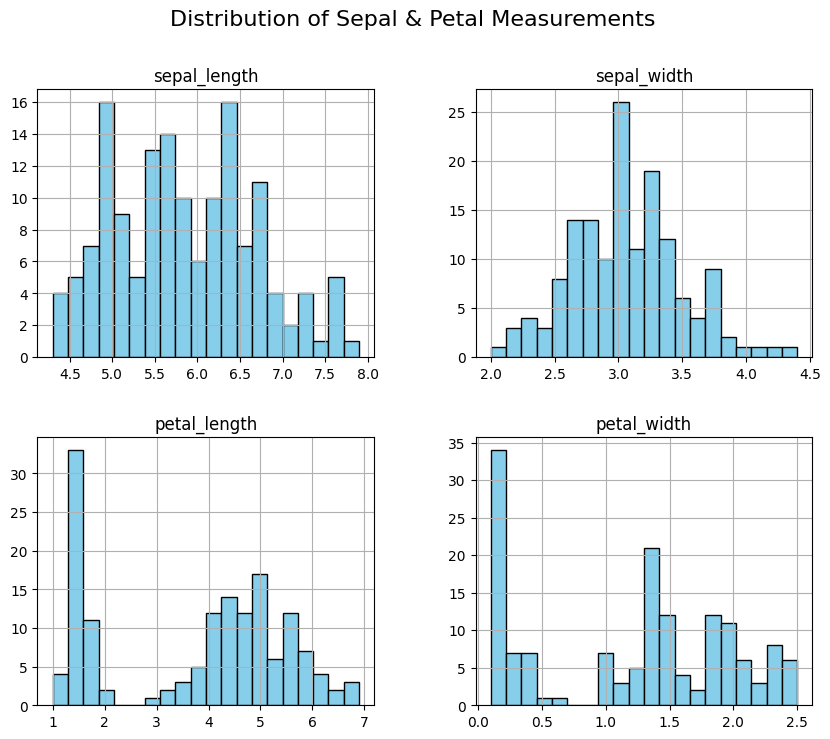

In [31]:
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Sepal & Petal Measurements", fontsize=16)
plt.show()

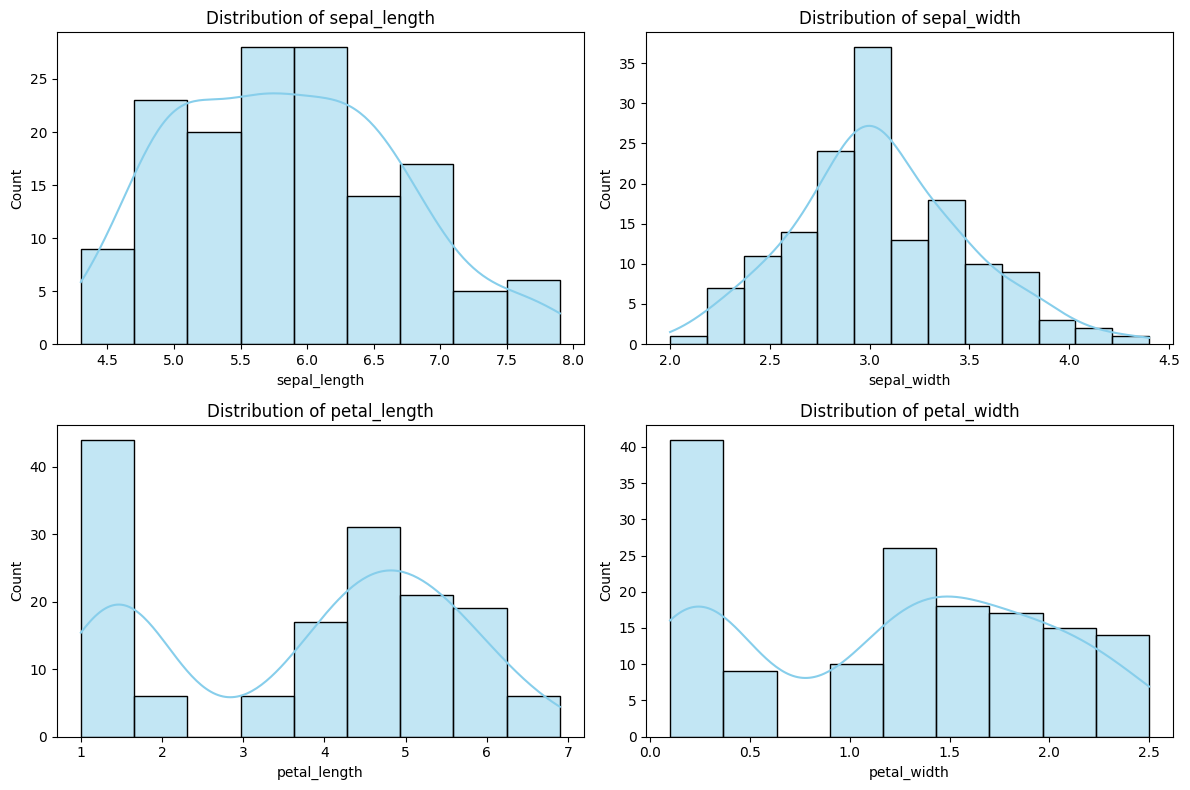

In [32]:
# Distribution plots for individual features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

## Variation for individual features

C:\Users\USER\AppData\Local\Temp\ipykernel_14460\3300994222.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = df.groupby("species")[column].std()
C:\Users\USER\AppData\Local\Temp\ipykernel_14460\3300994222.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std = df.groupby("species")[column].std()
C:\Users\USER\AppData\Local\Temp\ipykernel_14460\3300994222.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std 

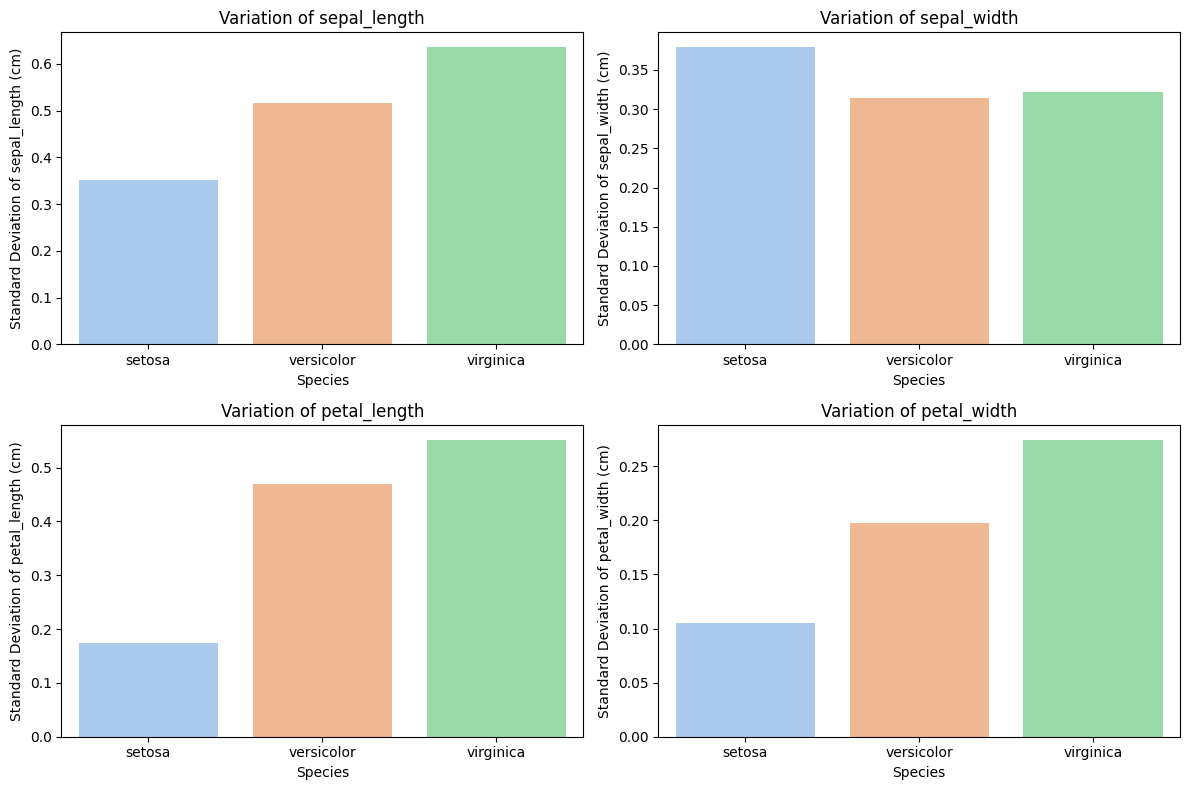

In [33]:
# Variation plots for individual features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    # sns.bar(df[column], kde=True, color='skyblue')
    std = df.groupby("species")[column].std()
    sns.barplot(x=std.index, y=std.values, palette="pastel", legend=False, hue=std.index)
    plt.title(f'Variation of {column}')
    plt.xlabel("Species")
    plt.ylabel(f"Standard Deviation of {column} (cm)")
    plt.tight_layout()
plt.show()

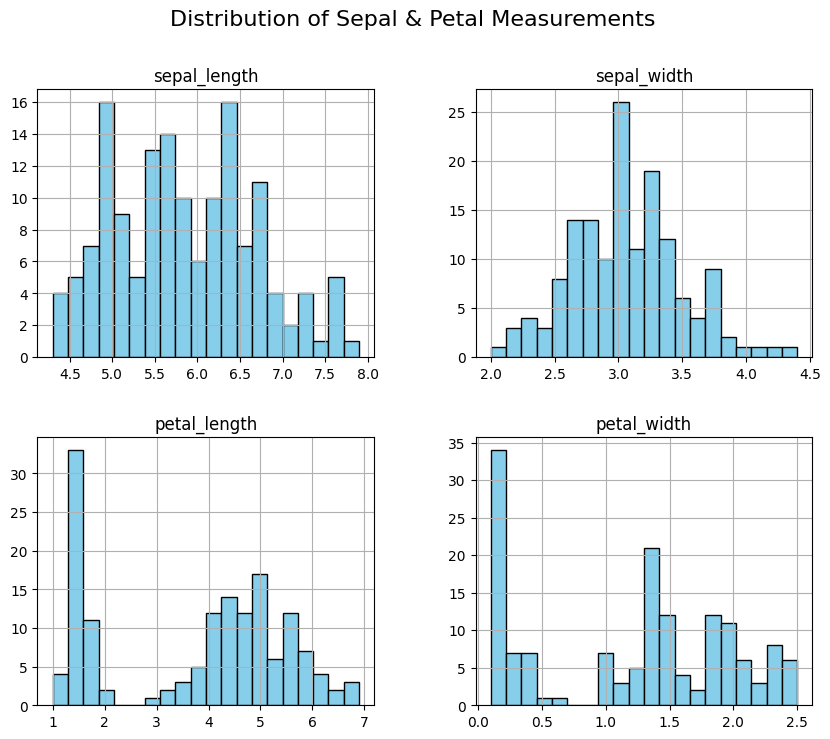

In [34]:
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Sepal & Petal Measurements", fontsize=16)
plt.show()

## Correlation Heatmap

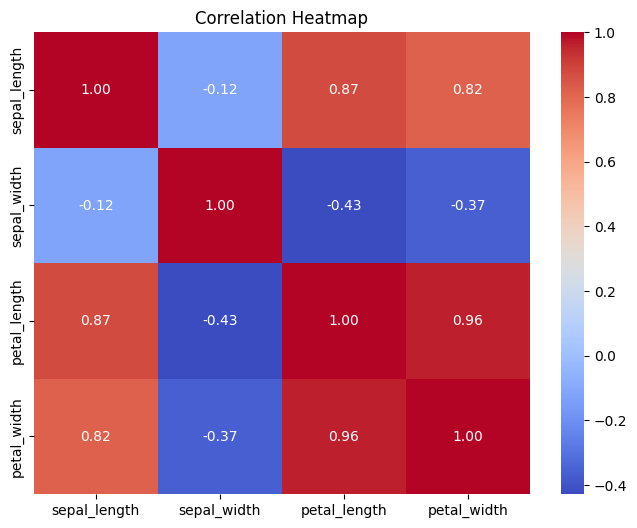

In [35]:
# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Prediction - Logistic Regression

In [36]:
X = df.drop('species', axis=1)  # Features: all numerical columns
y = df['species']    # Target: species

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression Model
model = LogisticRegression(max_iter=200)

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Prediction - KNN

In [37]:
# Initialize Logistic Regression Model
model = KNeighborsClassifier(n_neighbors=5)

# Train the Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


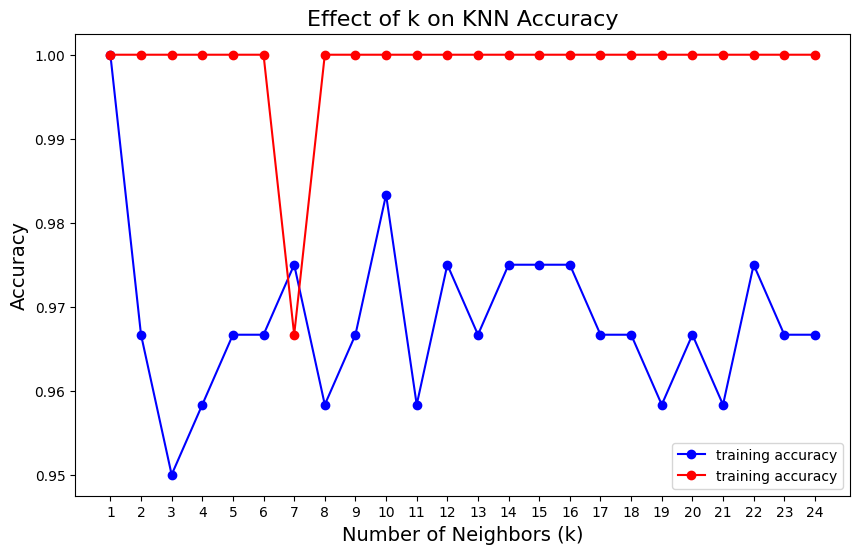

In [38]:
# Test k values from 1 to 10
k_values = range(1, 25)
test_accuracy = []
training_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, training_accuracy, marker='o', linestyle='-', color='b', label='training accuracy')
plt.plot(k_values, test_accuracy, marker='o', linestyle='-', color='r', label='training accuracy')
plt.title("Effect of k on KNN Accuracy", fontsize=16)
plt.xlabel("Number of Neighbors (k)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(k_values)
plt.legend()
plt.show()